In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split


%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
import tensorflow as tf


from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM , BatchNormalization
from keras.layers.core import Dense, Dropout
from keras.regularizers import L1L2

In [ ]:
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('/content/drive/MyDrive/Dataset/WISDM DATA/WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df = df.dropna()

In [ ]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [ ]:
df.activity.value_counts()

Walking       424397
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

In [ ]:
N_TIME_STEPS = 200
N_FEATURES = 3
step = 20
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)

In [ ]:
np.array(segments).shape

(54901, 3, 200)

In [ ]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [ ]:
reshaped_segments.shape

(54901, 200, 3)

In [ ]:
labels[0]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
len(X_train)

43920

In [ ]:
len(X_test)

10981

In [ ]:
y_train.shape

(43920, 6)

In [ ]:
timesteps = 200
input_dim = 3
n_classes = 6

In [ ]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 64

In [ ]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4608      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 4,806
Trainable params: 4,806
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [ ]:
# Training the model
model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/30
2745/2745 [==============================] - 43s 8ms/step - loss: 0.9472 - accuracy: 0.6541 - val_loss: 0.4742 - val_accuracy: 0.8297
Epoch 2/30
2745/2745 [==============================] - 23s 8ms/step - loss: 0.5323 - accuracy: 0.8119 - val_loss: 0.4550 - val_accuracy: 0.8339
Epoch 3/30
2745/2745 [==============================] - 26s 9ms/step - loss: 0.4620 - accuracy: 0.8356 - val_loss: 0.3723 - val_accuracy: 0.8621
Epoch 4/30
2745/2745 [==============================] - 25s 9ms/step - loss: 0.4147 - accuracy: 0.8516 - val_loss: 0.3545 - val_accuracy: 0.8672
Epoch 5/30
2745/2745 [==============================] - 23s 8ms/step - loss: 0.3811 - accuracy: 0.8643 - val_loss: 0.3240 - val_accuracy: 0.8784
Epoch 6/30
2745/2745 [==============================] - 22s 8ms/step - loss: 0.3616 - accuracy: 0.8689 - val_loss: 0.2845 - val_accuracy: 0.8943
Epoch 7/30
2745/2745 [==============================] - 25s 9ms/step - loss: 0.3310 - accuracy: 0.8812 - val_loss: 0.2748 - val_ac

In [ ]:
# Model execution
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim),return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(48))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200, 64)           17408     
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 64)           256       
_________________________________________________________________
dropout (Dropout)            (None, 200, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 48)                21696     
_________________________________________________________________
dropout_1 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 294       
Total params: 39,654
Trainable params: 39,526
Non-trainable params: 128
__________________________________

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
history=model.fit(X_train,
          y_train,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          epochs=epochs)

Epoch 1/30
2745/2745 [==============================] - 299s 99ms/step - loss: 0.7699 - accuracy: 0.7261 - val_loss: 0.3962 - val_accuracy: 0.8605
Epoch 2/30
2745/2745 [==============================] - 272s 99ms/step - loss: 0.3750 - accuracy: 0.8688 - val_loss: 0.2798 - val_accuracy: 0.8993
Epoch 3/30
2745/2745 [==============================] - 270s 98ms/step - loss: 0.2826 - accuracy: 0.9044 - val_loss: 0.2446 - val_accuracy: 0.9236
Epoch 4/30
2745/2745 [==============================] - 265s 97ms/step - loss: 0.2350 - accuracy: 0.9263 - val_loss: 0.2029 - val_accuracy: 0.9378
Epoch 5/30
2745/2745 [==============================] - 267s 97ms/step - loss: 0.1992 - accuracy: 0.9390 - val_loss: 0.1428 - val_accuracy: 0.9548
Epoch 6/30
2745/2745 [==============================] - 271s 99ms/step - loss: 0.1835 - accuracy: 0.9468 - val_loss: 0.1585 - val_accuracy: 0.9475
Epoch 7/30
2745/2745 [==============================] - 271s 99ms/step - loss: 0.1537 - accuracy: 0.9533 - val_loss: 0

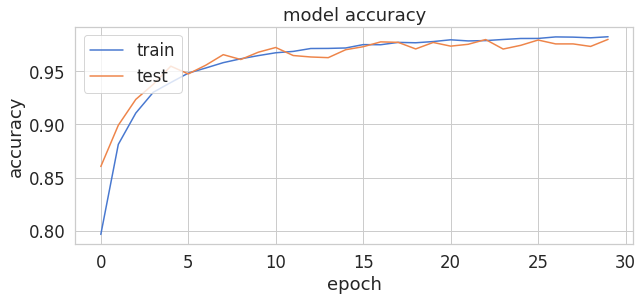

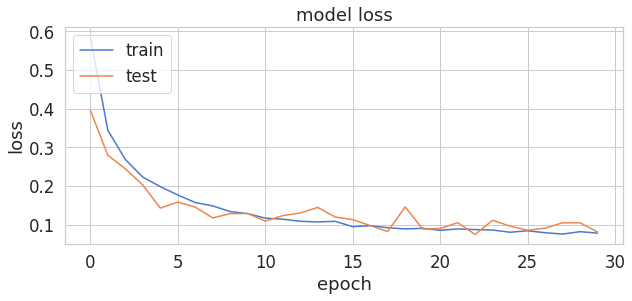

In [ ]:

from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [ ]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1058
           1       0.99      0.99      0.99      3447
           2       0.99      0.98      0.99       577
           3       0.97      1.00      0.98       437
           4       0.93      0.95      0.94      1207
           5       1.00      0.99      0.99      4255

    accuracy                           0.98     10981
   macro avg       0.97      0.97      0.97     10981
weighted avg       0.98      0.98      0.98     10981



In [ ]:
 with open('/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [ ]:
%matplotlib inline
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, pred)

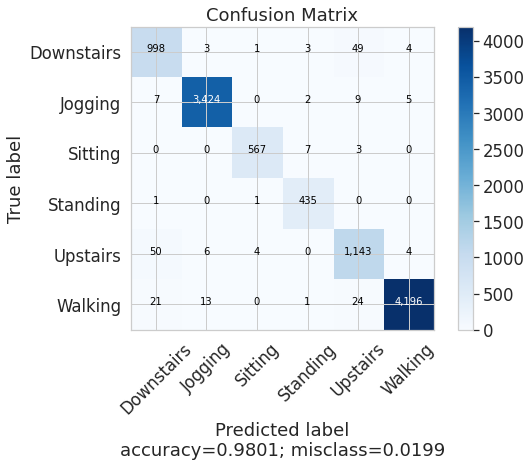

In [ ]:
plot_confusion_matrix(CM, 
                      normalize    = False,
                      target_names=['Downstairs','Jogging','Sitting','Standing','Upstairs','Walking'],
                      title        = "Confusion Matrix")

In [ ]:
#### Conclusion
1. In recent years, traditional machine learning methods hav progressed markedly. Machine learning techniques can be\
helpful, but it has a limitation of domain knowledge.
2. 